# Procesamiento de histogramas:
<span style="font-family: 'Verdana'; color: red;"> *Bronquivoide* </span>

# Breve introducción:

### El histograma de una imagen digital es un sistema que va a describir cómo es la distribución de niveles de intensidad en una imagen.

### En los notebooks de transformaciones de intensidad habíamos mencionado que la intensidad de una imagen tomaba valores discretos en el intervalo $[0,L-1]$, por lo que a partir de esto definimos el histograma de una imagen digital, de manera analítica, como la función discreta:

### <font size="5"> $H(r_k)=n_k $</font>, en donde $r_k$ es el $k-$ésimo valor de intensidad y $n_k$ el número de pixeles en la imagen que poseen una magnitud de intensidad $r_k$. Por lo que podemos decir que $H$ representa una frecuencia de ocurrencia sobre en cuántos pixeles se presenta la misma intensidad.

### Equivalentemente, podemos expresar el histograma en términos normalizados al orden $M \times N$ de la imagen:

### <font size="5"> $P(r_k)=\frac{n_k}{M\cdot N} $</font>, en donde $P$ es la probabilidad de que haya un pixel de intensidad $r_k$ en una imagen.

### Normalmente se manipula una imagen en términos de los histogramas porque esto permite mejorar la calidad de la imagen.

### En el caso de imágenes en escala de grises se presenta únicamente un solo histograma, puesto que la escala de grises es un espacio unidimensional, hablamos de un solo canal de color.

### Para las imágenes a color (en un espacio RGB) tenemos un histograma por cada componente de color, es decir, un histograma para la componente roja, uno para la verde y uno para la azul.

# Ejercicio:

### Vamos a visualizar el histograma asociado a una imagen en escala de grises usando OpenCV. Para esto se utiliza la función *cv2.calcHist*, la cual recibe cinco argumentos:

### 1) Una imagen.

### 2) Un canal para calcular el histograma.

### 3) Si hay una ROI o no.

### 4) La cantidad posibles valores de intensidad.

### 5) El rango de valores de intensidad.

### Vamos a usar la imagen que hemos usado anteriormente, una radiografía digital de cráneo: *"Cráneo.jpg"* (importante recordar que a OpenCV no le gustan los formatos de nombre de imagen con tildes).

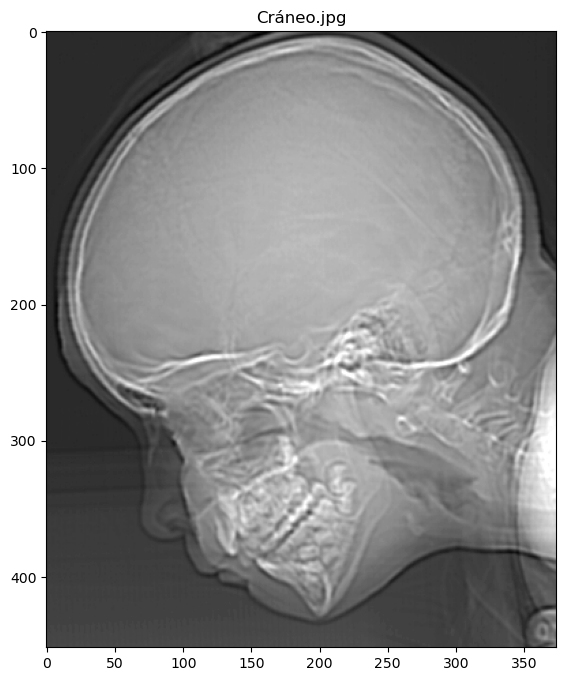

El orden de la imagen es: (452, 374)
 
El valor máximo de intensidad asociado a la imagen es 255.
 
El valor mínimo de intensidad asociado a la imagen es 12, lo que quiere decir que no vamos a encontrar pixeles de intensidad por debajo de este valor.
 


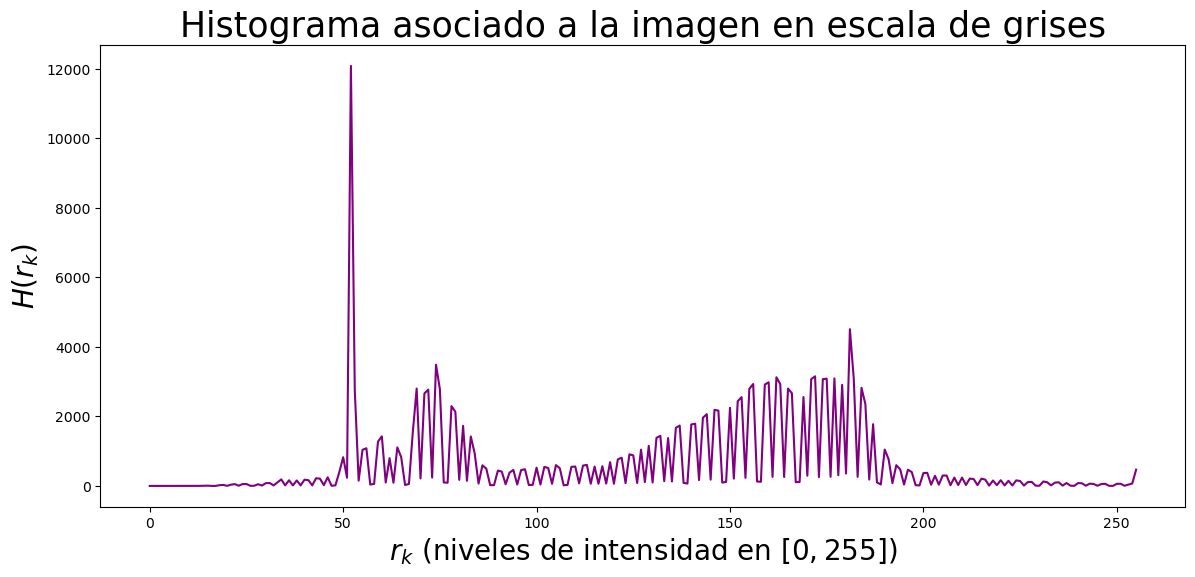

El orden del histograma es: (256, 1)
 
El valor máximo de pixeles que comparten el mismo valor de intensidad es 12089, cuya intensidad corresponde a 52.
 


In [32]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#Carga y display de la imagen en escala de grises:
imagen_grises=cv2.imread('Craneo.jpg', 0)
plt.figure(figsize=(16,8))
plt.imshow(imagen_grises,cmap='gray')
plt.title("Cráneo.jpg")
plt.show()

#Información útil para definir el histograma:
print(f"El orden de la imagen es: {imagen_grises.shape}")
print(" ")
print(f"El valor máximo de intensidad asociado a la imagen es {np.max(imagen_grises)}.")
print(" ")
print(f"El valor mínimo de intensidad asociado a la imagen es {np.min(imagen_grises)}, lo que quiere decir que no vamos a encontrar pixeles de intensidad por debajo de este valor.")
print(" ")

#Histograma con calcHist:
histograma_grises=cv2.calcHist([imagen_grises],channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.figure(figsize=(14,6))
plt.plot(histograma_grises,color="purple")
plt.xlabel(r"$r_k$ (niveles de intensidad en $[0,255]$)", fontsize = 20)
plt.ylabel(r"$H(r_k)$", fontsize = 20)
plt.title("Histograma asociado a la imagen en escala de grises", fontsize=25)
plt.show()

#Datos del histograma:
print(f"El orden del histograma es: {histograma_grises.shape}")
print(" ")
print(f"El valor máximo de pixeles que comparten el mismo valor de intensidad es {int(np.max(histograma_grises))}, cuya intensidad corresponde a {np.argmax(histograma_grises)}.")
print(" ")

### Si queremos normalizar el histograma:

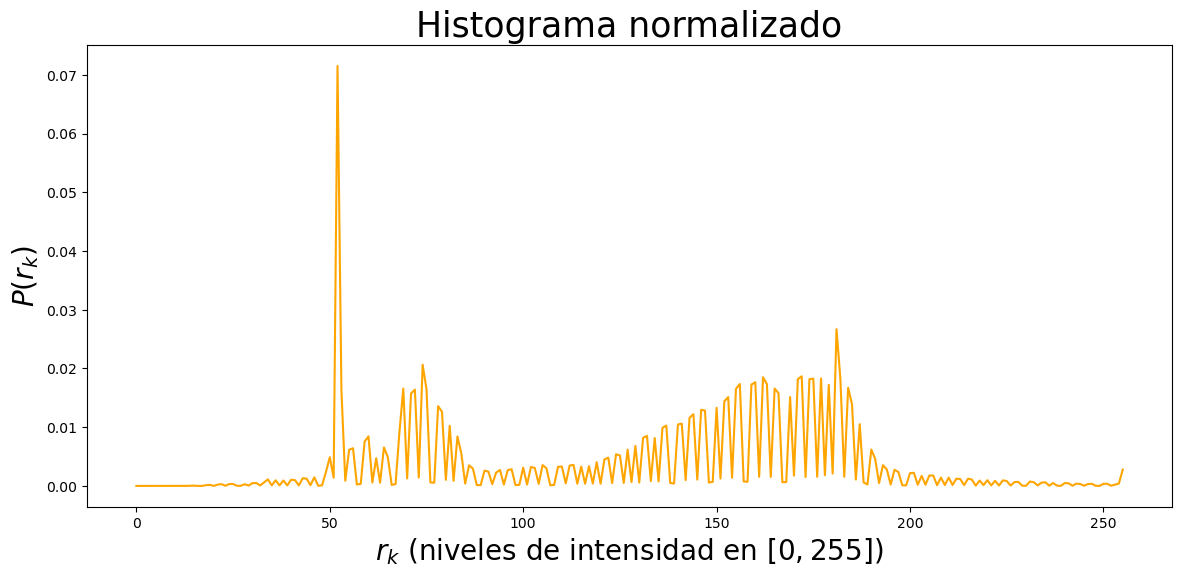

La probabilidad máxima es de 0.07151223321186882, la cual corresponde a hallar un pixel de intensidad 52.
 


In [33]:
#Histograma normalizado:
histograma_grises_normalizado=(histograma_grises) / (imagen_grises.size) #la función .size considera el producto MxN=452x374
plt.figure(figsize=(14,6))
plt.plot(histograma_grises_normalizado,color="orange")
plt.xlabel(r"$r_k$ (niveles de intensidad en $[0,255]$)", fontsize = 20)
plt.ylabel(r"$P(r_k)$", fontsize = 20)
plt.title("Histograma normalizado", fontsize=25)
plt.show()

print(f"La probabilidad máxima es de {np.max(histograma_grises_normalizado)}, la cual corresponde a hallar un pixel de intensidad {np.argmax(histograma_grises_normalizado)}.")
print(" ")


# Fin del ejercicio:
### Bibliografía recomendada:

### $\blacksquare$ Gonzalez, R. C., & Woods, R. E. (2008). Digital image processing (3rd ed.). Pearson.